In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Network file information
netwkdir = '/Users/felix/Projects/stacs/networks/polynet'
filebase = 'polynet'
recbase = netwkdir + '/record/' + filebase
npdat = 4
npnet = 8

In [3]:
# Reindex across partitioned output files

vtxmods = {}
## Get files
for datidx in range(0,npdat) :
    fname = netwkdir + '/' + filebase + '.state.' + str(datidx)
    with open(fname, 'r') as fstate:
        for line in fstate:
            vtxmods[line.split(None, 1)[0]] = vtxmods.get(line.split(None, 1)[0], 0) + 1

## Bookkeeping
maxidx = 0
preidx = {}
vtxidx = {}
for key, value in vtxmods.items():
    print (key, value)
    preidx[key] = maxidx
    vtxidx[key] = 0
    maxidx += value

print ('total vertices:', maxidx)

## Reindexing
index = 0
vtxmap = np.zeros((maxidx,1))
for datidx in range(0,npdat) :
    fname = netwkdir + '/' + filebase + '.state.' + str(datidx)
    with open(fname, 'r') as fstate:
        for line in fstate:
            vertex = line.split(None, 1)[0]
            vtxmap[index] = preidx[vertex] + vtxidx[vertex]
            #vtxmap[preidx[vertex] + vtxidx[vertex]] = index
            index += 1
            vtxidx[vertex] += 1

izhiex 800
izhiin 200
izhithal 1
total vertices: 1001


In [4]:
# Timing information (also determines which files to grab)

tmin = 0
trec = 1000
tmax = 20000
TICKS_PER_MS = 1000000

## Get files
# rec times
trecs = list(range(tmin+trec, tmax, trec))
if (not trecs) :
      trecs.append(tmax)
if (trecs[-1] < tmax) :
    trecs.append(tmax)
# check filenames
for r in range(0,npdat) :
    for t in trecs :
        fname = recbase + '.evtlog.' + str(t) + '.' + str(r)
        if not (os.path.isfile(fname)) :
            print ('file %s does not exist' % fname)
            
## Read event data
evtlist = list()
for t in trecs :
    for r in range(0,npdat) :
        # open file for reading
        fname = recbase + '.evtlog.' + str(t) + '.' + str(r)
        if (os.path.isfile(fname)) :
            with open(fname, 'r') as frec:
                for line in frec :
                    words = line.split()
                    evtype = int(words[0])
                    tstamp = int(words[1], 16) // TICKS_PER_MS
                    idx = int(words[2])
                    # reindex
                    idx = vtxmap[idx]
                    evtlist.append([tstamp, idx])
# convert to numpy array
evtlog = np.array(evtlist, dtype='object')

In [5]:
evtlog.shape

(74204, 2)

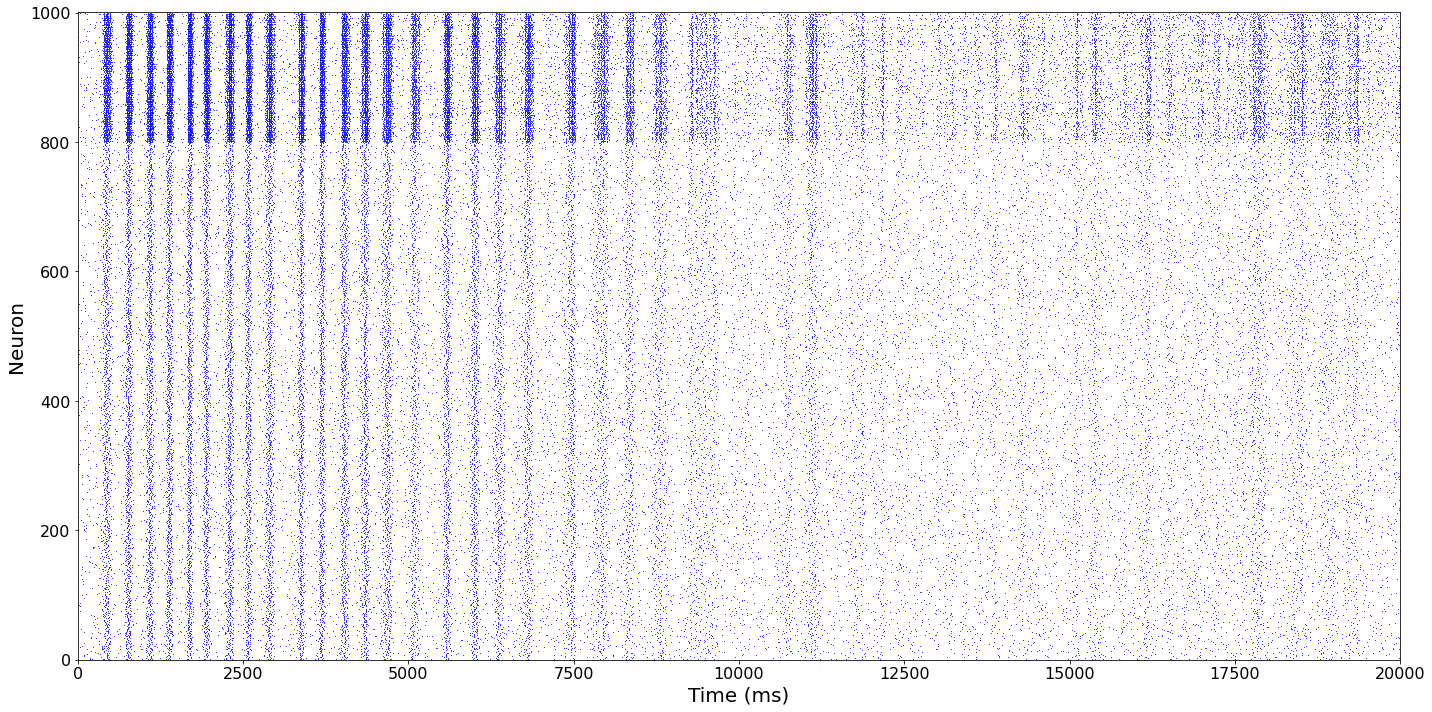

In [6]:
## Plot event data
plt.figure(figsize=(20,10))
plt.plot(evtlog[:,0], evtlog[:,1], linestyle="none", marker="o", markersize=1.0, markerfacecolor="blue", markeredgecolor="blue", markeredgewidth=0.0)
plt.axis([tmin, tmax, 0, vtxmap.shape[0]])
plt.xlabel('Time (ms)', fontsize=20)
plt.ylabel('Neuron', fontsize=20)
plt.tick_params(labelsize=16)
plt.tight_layout()
plt.savefig('raster.eps', format='eps', dpi=1000)
plt.show()